### The following information is obtained from here to help us understand better:
https://www.section.io/engineering-education/data-mining-using-crisp-dm-methodology/

<img src="crisp-dm-framework.png" alt="CRISP-DM framework" width="500" height="600">

# CRISP-DM 

## Understanding the problem statement.
    
What is the problem?
What are the objectives?
How is the success of the project measured?
who benefit from this?

## Understanding the data.
#### -Exploratory Data Analysis
<p>Techniques and tools like:<br>
    Graphical techniques 
    <li>Histogram
    <li>scatter plot
    <li>Bar chart<br>

## Preparing the data.
<li>Gathering: When gathering data — you may need to collect data from multiple sources within your organization.
<li>Cleansing: The data set you are working with may have issues that you want to resolve prior to your analysis. This can be <li>in the form of incorrect or missing data.
<li>Formatting: You may need to format the data by changing the way a date field appears, renaming a field, or even rotating <li>the data, similar to using a pivot table.
<li>Blending: You may want to blend, or combine, your data with other datasets to enrich it with additional variables, similar <li>to using the vlookup function in Excel.
<li>Sampling: Lastly, you may want to sample the dataset and work with a more manageable number of records.

## Perform data analysis.
<li>Determine what methodology to use to solve the problem
<li>Determine the important factors or variables that will help solve the problem
<li>Build a model to solve the problem
<li>Run the model and move to the validation phase
<img src="1_lplRsfT08ZkPfSEB8MS-Gw.png" alt="determine a model" width="500" height="400">
    

## Validating the data.
various modeling techniques are selected and applied and their parameters are calibrated to optimal values. Typically, there are several techniques for the same data mining problem type. Some techniques have specific requirements on the form of data. Therefore, it is often required to step back to the data preparation phase.

## Presenting/Visualizing the data.
Things to consider:
<li>Determine the best method of presenting insights based on the analysis and audience.
<li>Stories speak more than facts.
<li>Ensure every decision is backed up by proper research.
<li>Enable the end user to have a visual workflow of the solution.

In [1]:
#importing standard required libraries
import pandas as pd
import numpy as np
import seaborn as sns #visualization
import matplotlib.pyplot as plt #visualization
import matplotlib.gridspec as gridspec
%matplotlib inline
sns.set(color_codes=True)
#importing sklearn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

import graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Understanding the data.

### dataset is obtained from here
https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification

In [3]:
df=pd.read_csv('C:\\Users\\DELL\\Documents\\train.csv',delimiter =',',header=0)
dftest=pd.read_csv('C:\\Users\DELL\\Documents\\test.csv',delimiter =',',header=0)
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [5]:
print (df.shape)

(2000, 21)


In [6]:
print (df.columns)

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [9]:
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [10]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [11]:
price= df['price_range']
print(price.value_counts())

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64


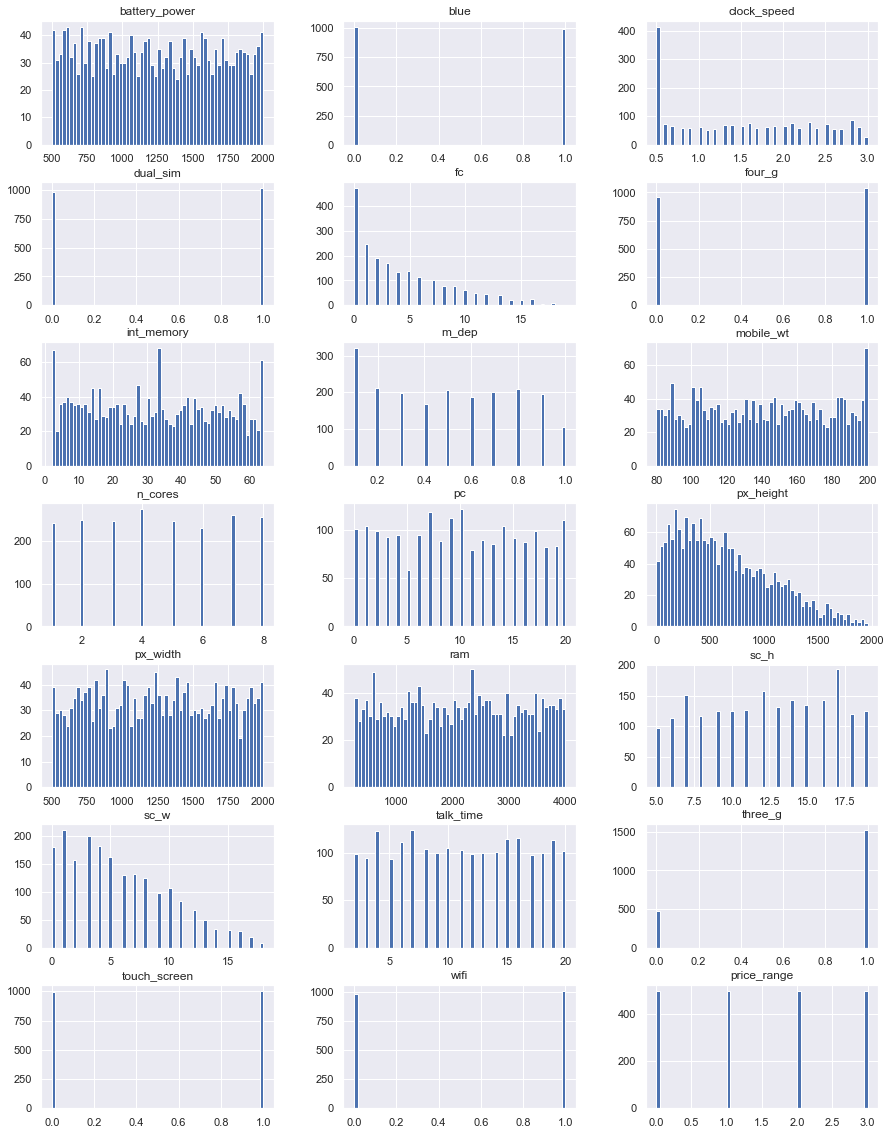

In [12]:
df.hist( grid=True, figsize=(15,20), layout=(7,3), bins=60)
plt.show()

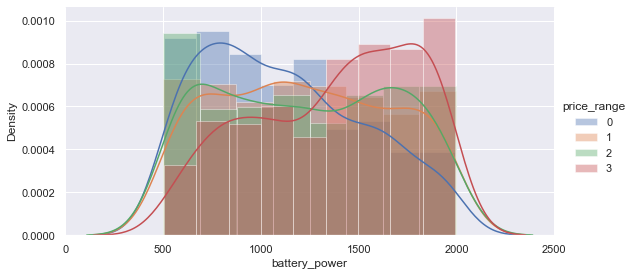

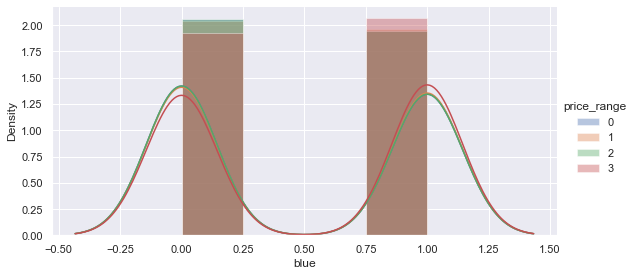

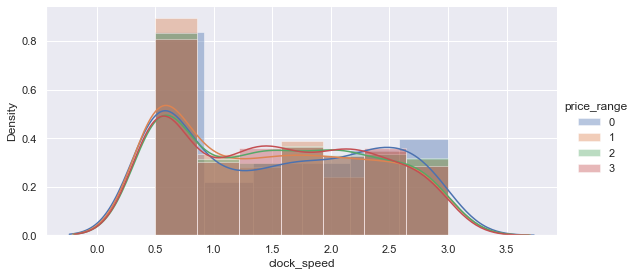

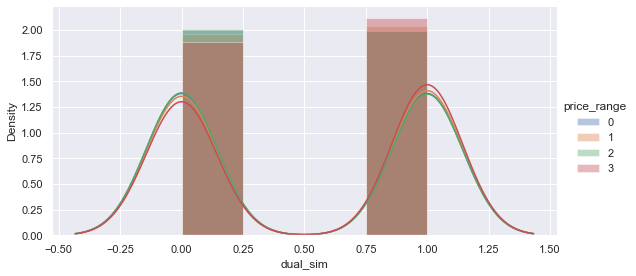

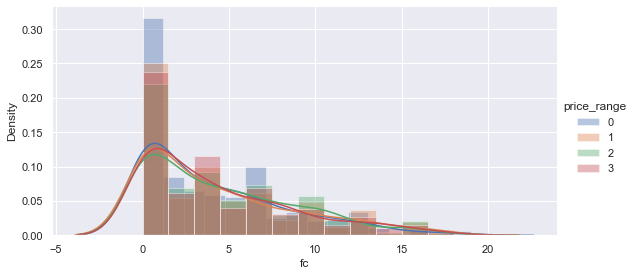

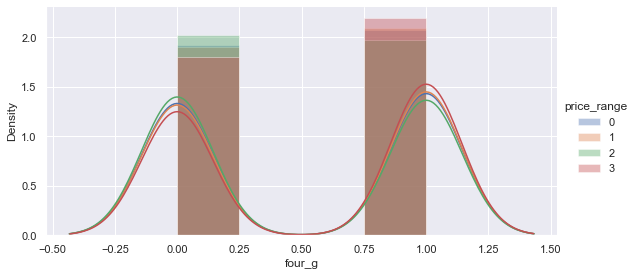

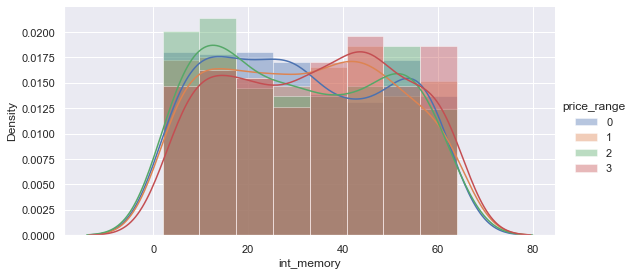

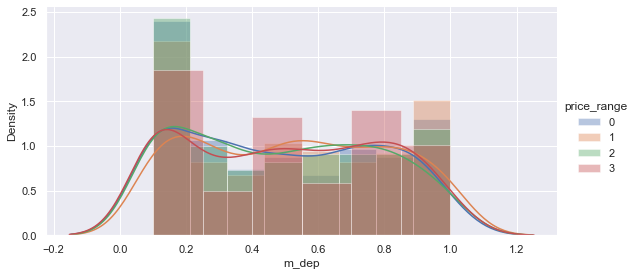

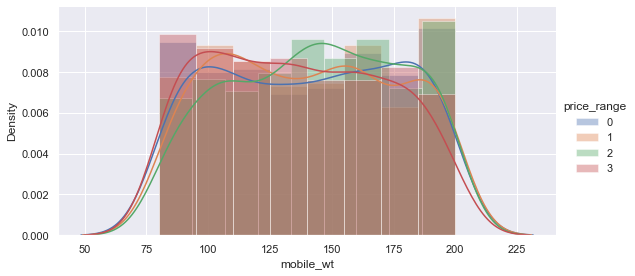

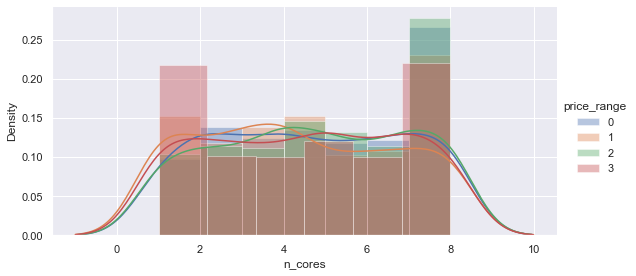

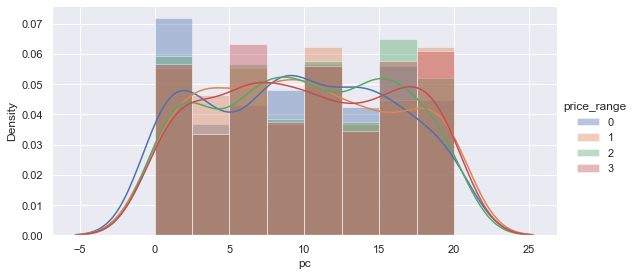

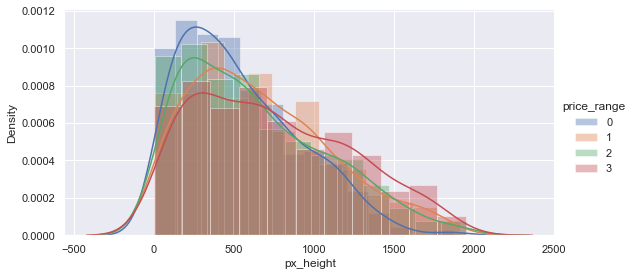

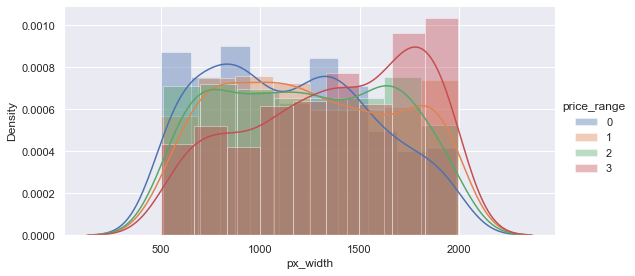

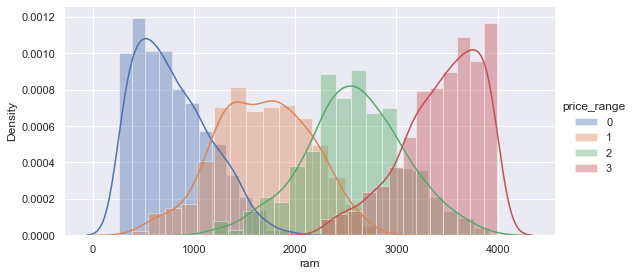

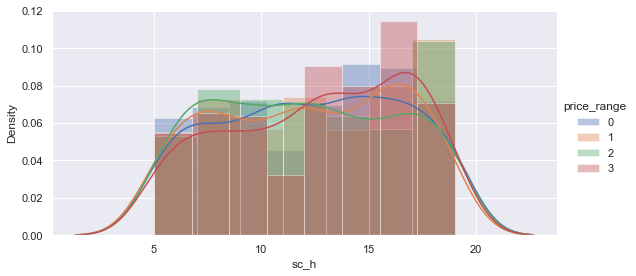

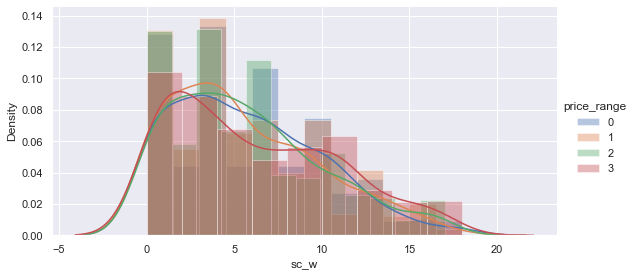

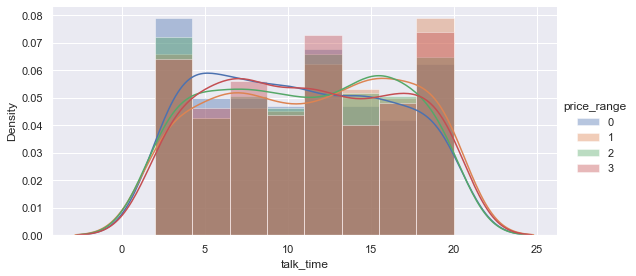

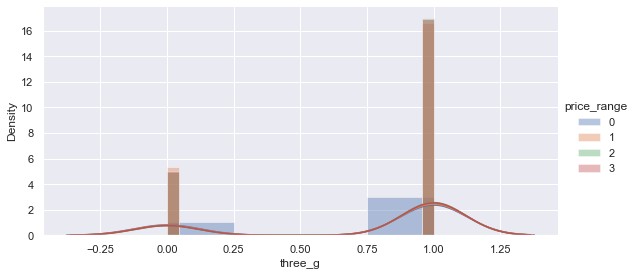

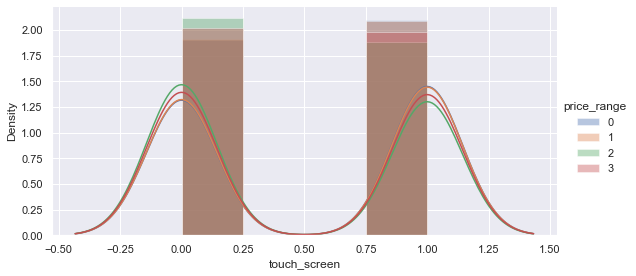

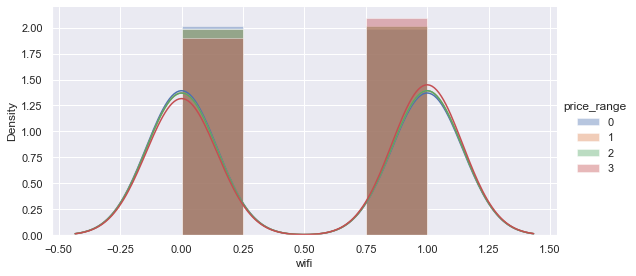

In [13]:
for ojha, feature in enumerate(list(df.columns)[:-1]):
    fg = sns.FacetGrid(df, hue ='price_range', height = 4, aspect=2, )
    fg.map(sns.distplot, feature).add_legend()
    plt.show()

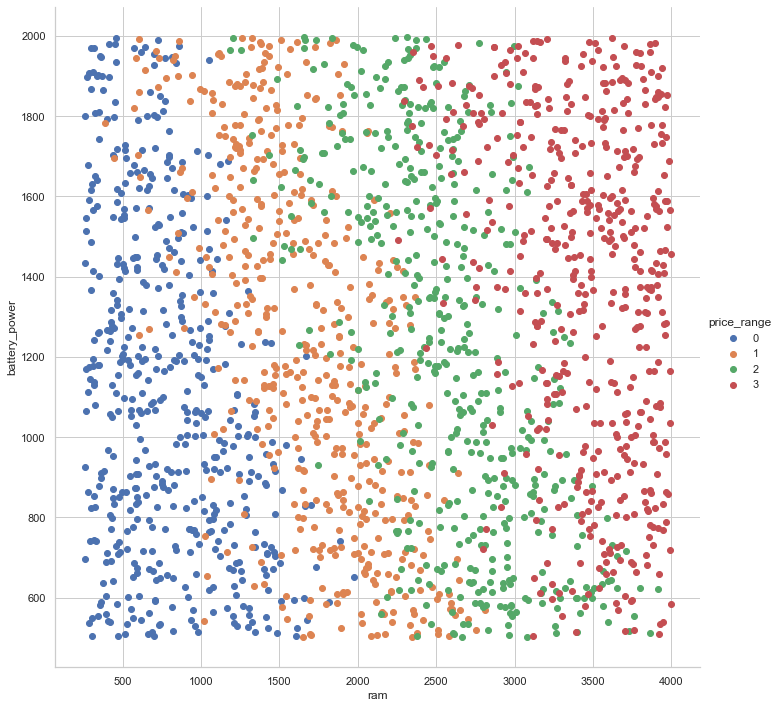

In [14]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="price_range", height=10).map(plt.scatter, "ram","battery_power").add_legend();
plt.show();

## Preparing the data.

### The dataset is clean it does need preparation. hence we move to the next phase.

## Perform data analysis.

In [15]:

# setting random seed
seed = 100
# Creating a LabelEncoder and fitting it to the dataset labels
le = LabelEncoder()
le.fit(df['price_range'].values)
#Converting dataset str label to int labels
y = le.transform(df['price_range'].values)
#Expecting the instance data.
x = df.drop('price_range', axis = 1).values
#splitting into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    stratify=y, random_state=seed)

In [16]:
print(x_train.shape)

(1600, 20)


In [17]:
print(x_test.shape)

(400, 20)


In [18]:
print(y_train.shape)

(1600,)


In [19]:
print(y_test.shape)

(400,)


In [20]:
df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


In [21]:
np.corrcoef(df)

array([[1.        , 0.90128146, 0.87027602, ..., 0.93540453, 0.71878856,
        0.96990117],
       [0.90128146, 1.        , 0.98088888, ..., 0.96372714, 0.76652974,
        0.87040416],
       [0.87027602, 0.98088888, 1.        , ..., 0.92275458, 0.66808499,
        0.8859005 ],
       ...,
       [0.93540453, 0.96372714, 0.92275458, ..., 1.        , 0.87951045,
        0.87783515],
       [0.71878856, 0.76652974, 0.66808499, ..., 0.87951045, 1.        ,
        0.57737594],
       [0.96990117, 0.87040416, 0.8859005 , ..., 0.87783515, 0.57737594,
        1.        ]])

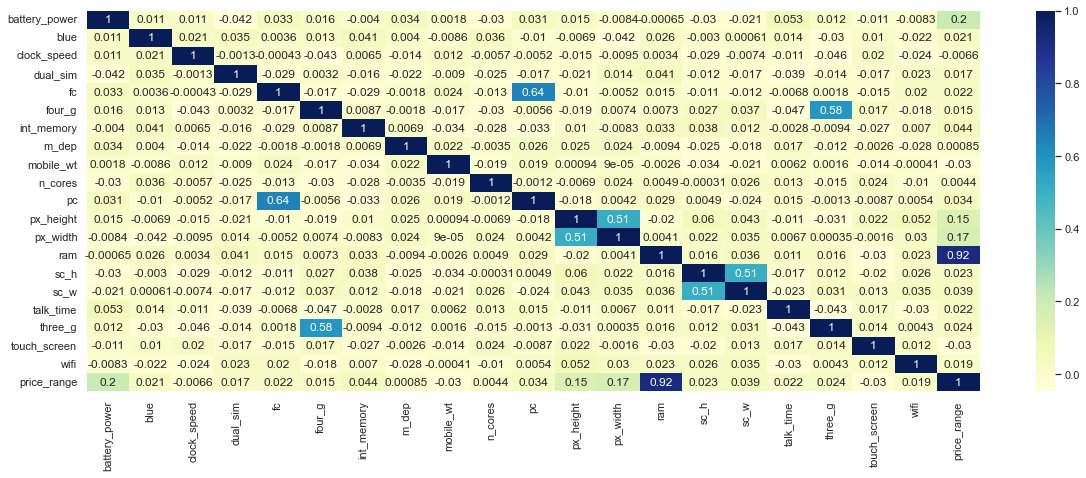

In [22]:
plt.figure(figsize=(20, 7))
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True)
plt.show()

## Decision tree

In [23]:
tree = DecisionTreeClassifier(criterion='gini',
                             min_samples_leaf=5,
                             min_samples_split=5,
                             max_depth=None,
                             random_state=seed)
tree.fit(x_train, y_train)
dt_y_pred = tree.predict(x_test)
dt_accuracy = accuracy_score(y_test, dt_y_pred)

print('DecisionTreeClassifier accuracy score: {}'.format(dt_accuracy))

DecisionTreeClassifier accuracy score: 0.855


Confusion Matrix for decesion tree is
[[94  6  0  0]
 [10 77 13  0]
 [ 0 12 79  9]
 [ 0  0  8 92]]


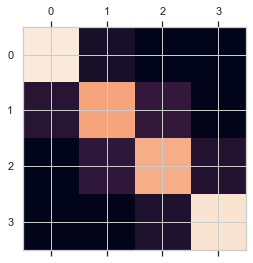

In [24]:
print('Confusion Matrix for decesion tree is')
print(confusion_matrix(y_test, dt_y_pred))
cm=confusion_matrix(y_test, dt_y_pred)
plt.matshow(cm)
plt.show()

In [25]:
print(classification_report(y_test, dt_y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       100
           1       0.81      0.77      0.79       100
           2       0.79      0.79      0.79       100
           3       0.91      0.92      0.92       100

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



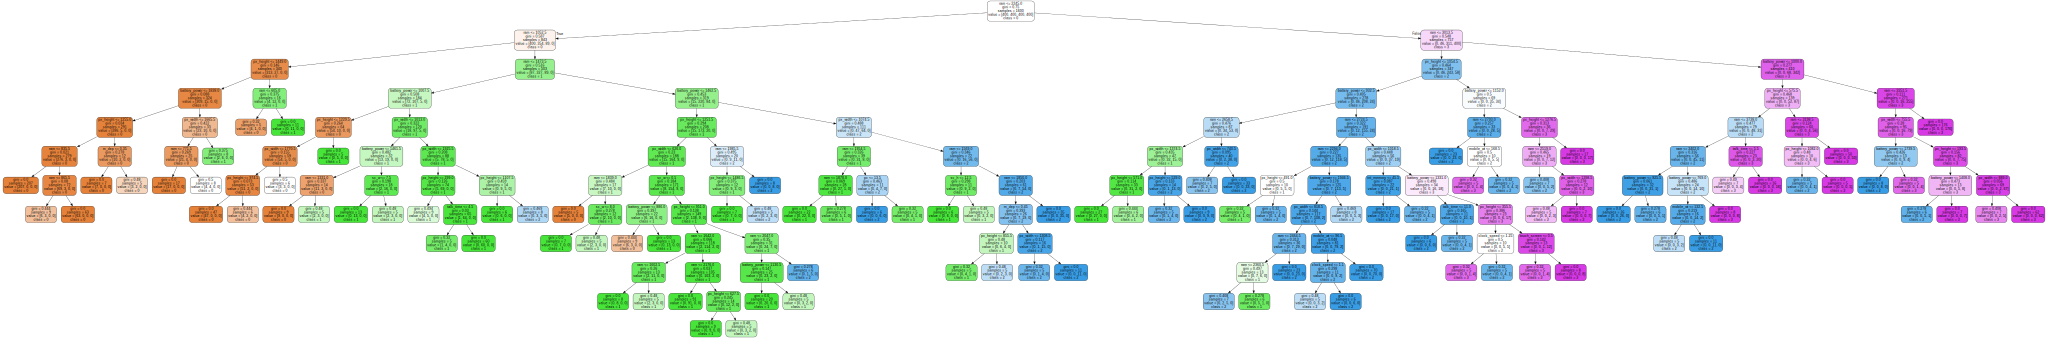

In [26]:
def plot_tree(tree, dataframe, label_col, label_encoder, plot_title):
    label_names = ['0','1','2','3']
    #Optaining plot data
    graph_data = export_graphviz(tree,
                                 feature_names=dataframe.drop(label_col, axis=1).columns,
                                 class_names=label_names,
                                 filled=True,
                                 rounded=True,
                                 out_file=None)
    #Generating plot.
    graph = graphviz.Source(graph_data,format='jpeg')
    graph.render(plot_title)
    return graph
tree_graph = plot_tree(tree, df, 'price_range', le, 'df')
tree_graph

### logistic regression

In [27]:
xt = x_train
yt = y_train

classifier = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter =10000)
classifier.fit(xt,yt)


LogisticRegression(max_iter=10000, multi_class='multinomial', solver='sag')

In [28]:
lr_y_pred = classifier.predict(x_test)
lr_accuracy = metrics.accuracy_score(y_test, lr_y_pred)
print('Score: \n',classifier.score(xt,yt))
print('Coefficints: \n',classifier.coef_)
print('Intercept: \n',classifier.intercept_)
print('LogisticRegrissionClassifier accuracy score: {}'.format(lr_accuracy))

Score: 
 0.70625
Coefficints: 
 [[-0.00132374  0.00829395  0.03714765  0.01226183  0.00175736  0.00631836
   0.0327215   0.00724904  0.04123559  0.09196712  0.07291638 -0.00194231
   0.00028112 -0.00530207  0.14235954  0.03886169  0.08544844  0.00977036
   0.01491979  0.01077465]
 [-0.00015962  0.00654875  0.00125815  0.00541465  0.01538379  0.00567411
   0.0097527   0.00564969  0.01146986 -0.0011507   0.01088974 -0.00031083
   0.00023129 -0.0007426   0.05014557 -0.00039061  0.04209932  0.00446675
   0.00440927  0.0011424 ]
 [ 0.00049434 -0.00249801 -0.00249418 -0.00491123  0.01424043 -0.00712216
  -0.01540537 -0.00328568 -0.01088738  0.0017211  -0.02851737  0.00059197
  -0.00016138  0.00190012 -0.05210811 -0.01838787 -0.02265398  0.00129505
  -0.01075604 -0.00433226]
 [ 0.00098902 -0.01234469 -0.03591162 -0.01276524 -0.03138159 -0.00487031
  -0.02706883 -0.00961305 -0.04181806 -0.09253752 -0.05528876  0.00166117
  -0.00035102  0.00414455 -0.140397   -0.02008321 -0.10489378 -0.01553216

Confusion Matrix for logistic regression is
[[86 13  1  0]
 [21 62 14  3]
 [ 1 18 51 30]
 [ 0  0 22 78]]


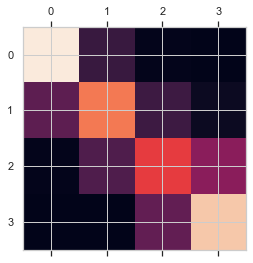

In [29]:
print('Confusion Matrix for logistic regression is')
print(metrics.confusion_matrix(y_test, lr_y_pred))
cm2=metrics.confusion_matrix(y_test, lr_y_pred)
plt.matshow(cm2)
plt.show()

In [30]:
print(classification_report(y_test, lr_y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       100
           1       0.67      0.62      0.64       100
           2       0.58      0.51      0.54       100
           3       0.70      0.78      0.74       100

    accuracy                           0.69       400
   macro avg       0.69      0.69      0.69       400
weighted avg       0.69      0.69      0.69       400



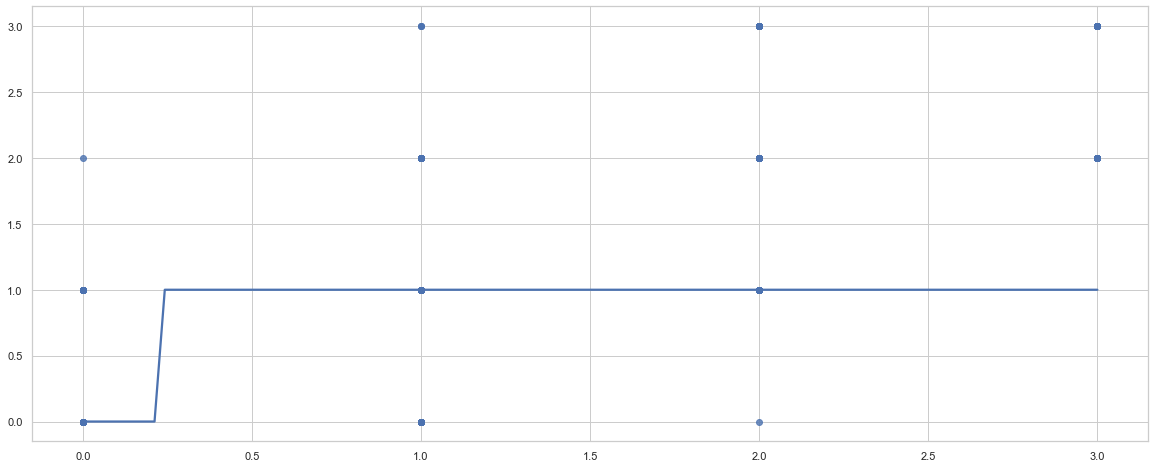

In [31]:
plt.figure(figsize=(20, 8))
sns.regplot(x=y_test, y=lr_y_pred, data=df,
                 logistic=True, ci=None)
plt.show()

## Validating the data.

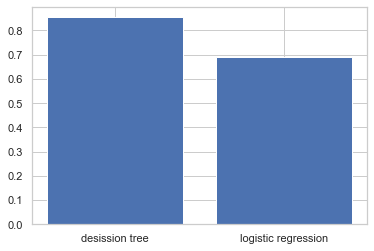

In [32]:
model =['desission tree','logistic regression']
accuracy_score=[0.855,0.692]
plt.bar(model,accuracy_score)
plt.ylabel=("accuracy score")
plt.show()

In [33]:
dftest.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [34]:
print (dftest.shape)

(1000, 21)


In [35]:
print (dftest.columns)

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')


In [36]:
print (df.columns)

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')


In [37]:
dftest=dftest.drop('id', axis=1)

In [38]:
dftest.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [39]:
dftest.shape

(1000, 20)

In [40]:
predict_by_tree= tree.predict(dftest)

In [41]:
predict_by_tree

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 1, 2, 1, 3, 2, 0, 2,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 1, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 3, 0, 2, 1, 0,
       1, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 2, 0, 1, 1, 3, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 2, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 1, 0, 3, 2, 3, 1, 0, 2,
       1, 1, 3, 1, 2, 0, 3, 2, 1, 2, 1, 3, 3, 3, 3, 2, 2, 3, 2, 3, 0, 0,
       2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 1, 0, 0, 2,
       0, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 1, 0, 0, 0, 0, 0, 3, 2, 1, 2, 2,
       2, 3, 1, 2, 3, 3, 3, 2, 2, 1, 0, 0, 1, 2, 1, 3, 3, 3, 1, 2, 0, 3,
       1, 2, 3, 0, 0, 1, 0, 3, 0, 1, 0, 3, 2, 1, 3, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 2, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 3, 2, 1, 3, 2, 0, 3, 0, 1, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 2, 2, 1, 2, 0, 2, 3, 1,

In [42]:
dftest['price_range'] = predict_by_tree

In [43]:
price= dftest['price_range']
print(price.value_counts())

3    259
2    258
0    255
1    228
Name: price_range, dtype: int64


In [44]:
dftest.head(20)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1
5,1464,1,2.9,1,5,1,50,0.8,198,8,...,569,939,3506,10,7,3,1,1,1,3
6,1718,0,2.4,0,1,0,47,1.0,156,2,...,1283,1374,3873,14,2,10,0,0,0,3
7,833,0,2.4,1,0,0,62,0.8,111,1,...,1312,1880,1495,7,2,18,0,1,1,1
8,1111,1,2.9,1,9,1,25,0.6,101,5,...,556,876,3485,11,9,10,1,1,0,3
9,1520,0,0.5,0,1,0,25,0.5,171,3,...,52,1009,651,6,0,5,1,0,1,0


### Refrencess:
https://seaborn.pydata.org/api.html<br>
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html<br>
https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e<br>
https://www.analyticsvidhya.com/blog/2020/12/beginners-take-how-logistic-regression-is-related-to-linear-regression/#:~:text=The%20Differences%20between%20Linear%20Regression,Logistic%20regression%20provides%20discreet%20output.<br>
<br>